In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/reddy/Downloads/dmart_data_small.csv")  
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['total_price'] = df['quantity'] * df['unit_price']
df.dropna(inplace=True) 

Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['total_price'] >= Q1 - 1.5 * IQR) & (df['total_price'] <= Q3 + 1.5 * IQR)]
df.head()

,order_id,customer_id,product_id,product_category,store_id,order_date,unit_price,quantity,discount,total_price
0,1001,39,178,Household,2,2023-01-01,214.94,8,0.08,1719.52
1,1002,29,158,Snacks,3,2023-01-02,467.04,6,0.06,2802.24
2,1003,15,131,Personal Care,4,2023-01-03,434.37,7,0.15,3040.59
3,1004,43,195,Household,5,2023-01-04,32.16,3,0.18,96.48
4,1005,8,187,Beverages,5,2023-01-05,22.92,1,0.10,22.92


In [25]:

print(df['total_price'].describe())
print("Z-scores:\n", (df['total_price'] - df['total_price'].mean()) / df['total_price'].std())


customer_sales = df.groupby('customer_id')['total_price'].sum()
print("Top Customers:\n", customer_sales.sort_values(ascending=False).head())


count      98.000000
mean     1162.832041
std       912.920176
min        22.920000
25%       400.155000
50%       934.765000
75%      1705.060000
max      3545.910000
Name: total_price, dtype: float64
Z-scores:
 0     0.609788
1     1.795785
2     2.056870
3    -1.168067
4    -1.248644
        ...   
95   -0.300171
96   -0.447873
97   -0.149139
98    0.633810
99   -1.017342
Name: total_price, Length: 98, dtype: float64
Top Customers:
 customer_id
18    7083.12
21    6336.94
24    6283.85
47    5265.26
40    5246.42
Name: total_price, dtype: float64


C:\Users\reddy\AppData\Local\Temp\ipykernel_5852\681921084.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['total_price'].sum().plot(title='Monthly Sales Trend')


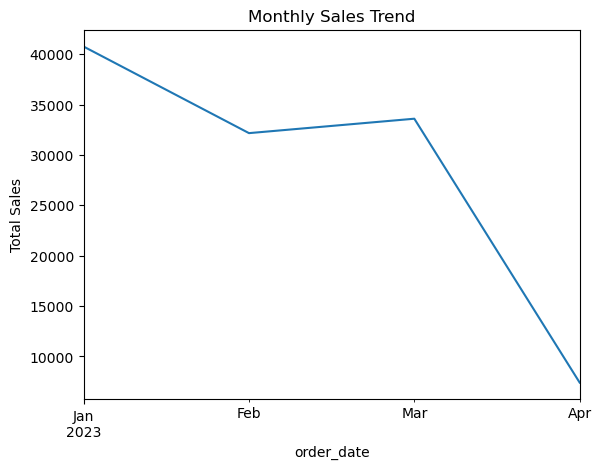

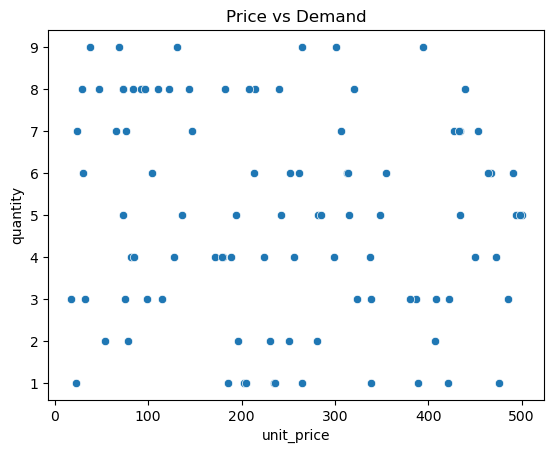

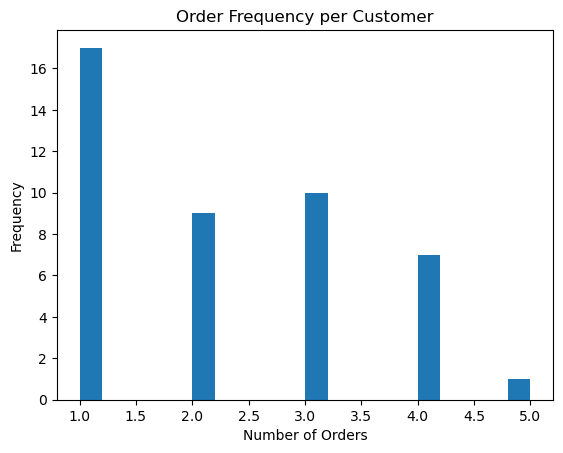

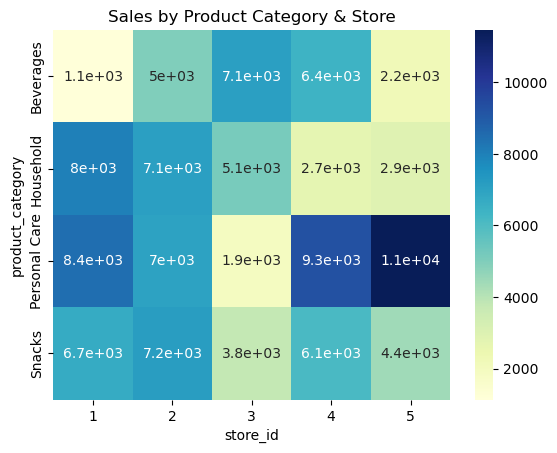

In [27]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date', inplace=True)
df.resample('M')['total_price'].sum().plot(title='Monthly Sales Trend')
plt.ylabel("Total Sales")
plt.show()
sns.scatterplot(data=df, x='unit_price', y='quantity')
plt.title("Price vs Demand")
plt.show()
df['customer_id'].value_counts().plot(kind='hist', bins=20, title="Order Frequency per Customer")
plt.xlabel("Number of Orders")
plt.show()
pivot = pd.pivot_table(df, values='total_price', index='product_category', columns='store_id', aggfunc='sum')
sns.heatmap(pivot, cmap='YlGnBu', annot=True)
plt.title("Sales by Product Category & Store")
plt.show()


             unit_price  discount  total_price
unit_price     1.000000   0.06849     0.718144
discount       0.068490   1.00000    -0.124600
total_price    0.718144  -0.12460     1.000000


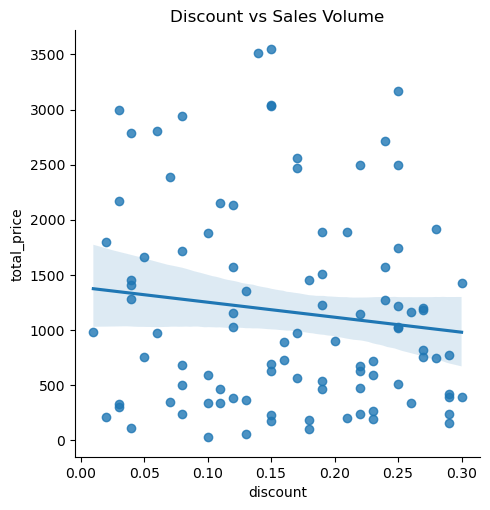

In [29]:
print(df[['unit_price', 'discount', 'total_price']].corr())
sns.lmplot(data=df, x='discount', y='total_price')
plt.title("Discount vs Sales Volume")
plt.show()


C:\Users\reddy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


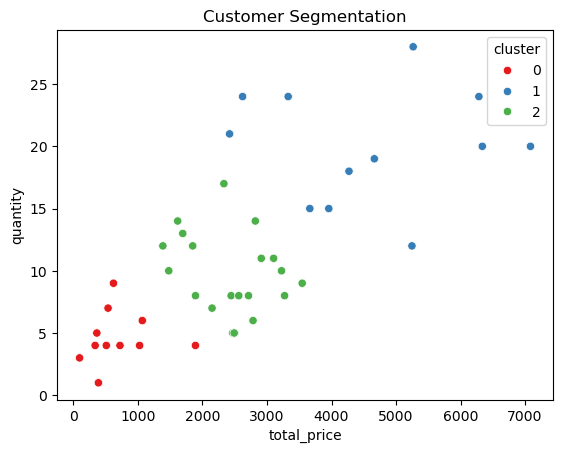

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features = df.groupby('customer_id')[['total_price', 'quantity']].sum()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
features['cluster'] = kmeans.fit_predict(features_scaled)

sns.scatterplot(data=features, x='total_price', y='quantity', hue='cluster', palette='Set1')
plt.title("Customer Segmentation")
plt.show()


In [33]:
import statsmodels.api as sm
X = df['discount']
y = df['total_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
X_multi = df[['unit_price', 'discount', 'quantity']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:            total_price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.514
Date:                Thu, 10 Apr 2025   Prob (F-statistic):              0.222
Time:                        15:31:38   Log-Likelihood:                -805.82
No. Observations:                  98   AIC:                             1616.
Df Residuals:                      96   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1386.1782    203.493      6.812      0.0

In [35]:
print(f"R²: {model_multi.rsquared}")
print(f"Standard Error: {model_multi.bse}")


R²: 0.8816574897315055
Standard Error: const         120.023241
unit_price      0.226732
discount      391.241270
quantity       13.323877
dtype: float64


In [3]:
import pandas as pd
df_raw = pd.read_csv("C:/Users/reddy/Downloads/dmart_data_small.csv")
print("BEFORE CLEANING")
print(df_raw.describe())
print("\nMissing Values:\n", df_raw.isnull().sum())


BEFORE CLEANING
          order_id  customer_id  product_id    store_id  unit_price  \
count   100.000000   100.000000  100.000000  100.000000  100.000000   
mean   1050.500000    25.070000  147.800000    3.040000  247.165200   
std      29.011492    14.447575   31.101658    1.483376  146.477771   
min    1001.000000     1.000000  100.000000    1.000000   17.130000   
25%    1025.750000    14.000000  119.000000    2.000000  109.380000   
50%    1050.500000    24.000000  151.000000    3.000000  237.720000   
75%    1075.250000    39.000000  172.500000    4.000000  381.715000   
max    1100.000000    50.000000  198.000000    5.000000  499.860000   

         quantity    discount  total_price  
count  100.000000  100.000000   100.000000  
mean     5.090000    0.165300  1020.884800  
std      2.502907    0.083236   836.576657  
min      1.000000    0.010000    20.630000  
25%      3.000000    0.100000   328.820000  
50%      5.000000    0.170000   766.525000  
75%      7.250000    0.240000

In [23]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

np.random.seed(42)
random.seed(42)
product_categories = ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Toys']
data = {
    'order_id': [f'ORD{str(i).zfill(3)}' for i in range(1, num_rows + 1)],
    'order_date': [datetime.now() - timedelta(days=random.randint(0, 30)) for _ in range(num_rows)],
    'product_category': [random.choice(product_categories) for _ in range(num_rows)],
    'quantity': np.random.randint(1, 10, num_rows),  
    'price': np.random.uniform(5, 100, num_rows),  
    'discount': np.random.uniform(0, 0.3, num_rows),  
}
df = pd.DataFrame(data)
df['total_price'] = df['quantity'] * df['price'] * (1 - df['discount'])

# Save to CSV file
df.to_csv('dmart_sales.csv', index=False)
print(df.head())


  order_id                 order_date product_category  quantity      price  \
0   ORD001 2025-03-24 15:00:18.544234        Groceries         7  41.378053   
1   ORD002 2025-04-10 15:00:18.544234         Clothing         4  97.312649   
2   ORD003 2025-04-13 15:00:18.544234      Electronics         8  85.646813   
3   ORD004 2025-03-21 15:00:18.544234             Toys         5  73.564305   
4   ORD005 2025-04-05 15:00:18.544234        Groceries         7  27.418567   

   discount  total_price  
0  0.298876   203.077991  
1  0.289626   276.513579  
2  0.167488   570.415974  
3  0.264791   270.425729  
4  0.056612   181.064407  


In [29]:
import pandas as pd
import numpy as np
df_raw = pd.read_csv("C:/Users/reddy/Downloads/dmart_sales.csv")
df_raw.columns = df_raw.columns.str.strip().str.lower()
print("BEFORE CLEANING\n")
print(df_raw.describe())  
print("\n Missing Values:\n", df_raw.isnull().sum())  


BEFORE CLEANING

         quantity       price    discount  total_price
count  100.000000  100.000000  100.000000   100.000000
mean     5.320000   50.765104    0.156458   228.770803
std      2.639559   25.898732    0.087336   183.178949
min      1.000000    5.049436    0.001555    16.623525
25%      3.000000   28.387901    0.087734    81.608168
50%      5.000000   49.024672    0.148963   165.940195
75%      8.000000   71.100193    0.231825   323.922598
max      9.000000   99.785346    0.298876   790.517108

 Missing Values:
 order_id            0
order_date          0
product_category    0
quantity            0
price               0
discount            0
total_price         0
dtype: int64


In [31]:
print("\n AFTER CLEANING\n")
print(df_clean.describe()) 
print("\n Missing Values After Cleaning:\n", df_clean.isnull().sum()) 
print("\n COMPARISON\n")
print(f"Total Rows Before: {df_raw.shape[0]}")
print(f"Total Rows After: {df_clean.shape[0]}")



 AFTER CLEANING

                          order_date   quantity      price   discount  \
count                             99  99.000000  99.000000  99.000000   
mean   2025-03-31 01:16:38.477126144   5.282828  50.283688   0.156951   
min       2025-03-14 09:31:11.204398   1.000000   5.049436   0.001555   
25%    2025-03-22 21:31:11.204391936   3.000000  28.322575   0.086882   
50%    2025-04-01 09:31:11.204428032   5.000000  48.370784   0.149758   
75%    2025-04-07 09:31:11.204380672   8.000000  71.086773   0.233084   
max       2025-04-13 09:31:11.204383   9.000000  99.785346   0.298876   
std                              NaN   2.626554  25.576867   0.087640   

       total_price  norm_quantity  norm_price  norm_total_price  
count    99.000000      99.000000   99.000000         99.000000  
mean    223.096597       0.535354    0.477477          0.266798  
min      16.623525       0.000000    0.000000          0.000000  
25%      81.484396       0.250000    0.245663          0.083

In [33]:
import pandas as pd
import numpy as np

# Load dataset (replace with your dataset)
df_raw = pd.read_csv("dmart_sales.csv")

# Apply log transformation to 'total_price' to reduce skewness
df_raw['log_total_price'] = np.log1p(df_raw['total_price'])  # log1p handles zero values

# Display transformed data
print("Log Transformed 'Total Price':")
print(df_raw[['total_price', 'log_total_price']].head())


Log Transformed 'Total Price':
   total_price  log_total_price
0   203.077991         5.318502
1   276.513579         5.625870
2   570.415974         6.348117
3   270.425729         5.603689
4   181.064407         5.204361


In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df_raw = pd.read_csv("dmart_sales.csv")
scaler = MinMaxScaler()
df_raw[['norm_quantity', 'norm_price', 'norm_total_price']] = scaler.fit_transform(
    df_raw[['quantity', 'price', 'total_price']]
)
print("Normalized Data:")
print(df_raw[['norm_quantity', 'norm_price', 'norm_total_price']].head())


Normalized Data:
   norm_quantity  norm_price  norm_total_price
0          0.750    0.383473          0.240930
1          0.375    0.973899          0.335821
2          0.875    0.850758          0.715593
3          0.500    0.723220          0.327955
4          0.750    0.236121          0.212485


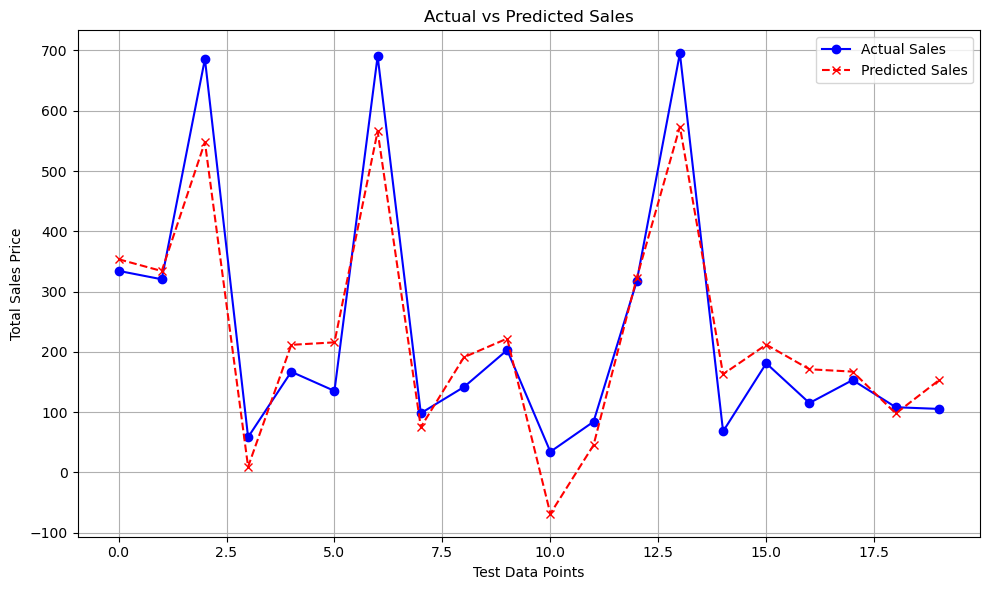

R² Score: 0.894
Root Mean Squared Error: 67.76


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_csv("dmart_sales.csv")
df.columns = df.columns.str.strip().str.lower()
if 'total_price' not in df.columns:
    df['total_price'] = df['quantity'] * df['price'] * (1 - df['discount'])
df.dropna(subset=['quantity', 'price', 'discount', 'total_price'], inplace=True)
X = df[['quantity', 'price', 'discount']]
y = df['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Total Sales Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.3f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
